## Logic Based FizzBuzz Function [Software 1.0]

In [285]:
import pandas as pd

def fizzbuzz(n):
    
    # Main Logic of the Fizz Buzz program. If the number is divisible by 3 and 5 then display FizzBuzz, 
    # If divisible only by 5 then display Buzz,
    # If divisible only by 3 then display Fizz.
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [286]:
def createInputCSV(start,end,filename):
    

    #
    ##Python knows a number of compound data types, 
    #used to group together other values. 
    #The most versatile is the list, which can be written as 
    #a list of comma-separated values (items) between square 
    #brackets. Lists might contain items of different types, 
    #but usually the items all have the same type.
    ## List is a collection which is ordered and changeable. Allows duplicate members.
    inputData   = []
    outputData  = []
    
    # Training data is nothing but the labelled inputs that the user gives to the Machine Learning model 
    # so that the model can understand the relationships between the inputs provided. The higher the training data, 
    # the better the model will be able to predict the test data with high accuracy. Hence we use around 900 data points
    # for training and 100 data points for testing.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Dataframes are two dimensional data structures which can be used to store row and column information.
    # Dataframes are mutable and provide the row and column label information and also they can be used for arithmetic 
    # operations
    ## Here dataset is a dict, which works like a hash table, with
    #input  and label as the keys
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Convert the dataset that we created from a dataframe to a csv using the to_csv method of the dataframe.
    # Converting the Dataframe obtained from "dataset" dict 
    # to a comma-separated values (csv) file specified by filename
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [287]:
def processData(dataset):
    
    # We need to process to obtain the input column data and
    # the label column data, and store it separately
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    # Processing the input data using the specified 
    # encodeData method where each individual element is processed
    processedData  = encodeData(data)
    
    # Processing the labels to encode them to specific
    # categorical target values like 
    # FizzBuzz = 3, Fizz = 1, Buzz = 2, Other = 0
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [288]:
def encodeData(data):
    
    # Encoding the data into 4 digit numbers between 0 to 1023
    # and storing them in their binary digit format
    
    processedData = []
    
    for dataInstance in data:
        # 10 here refers to power of 2, for representing 10 digit binary numbers
        # 2^10 is the range of numbers we need to work with 
        # We have 1000 numbers but the closest power of 2 is 2^10 which
        # is 1024 and that covers the 1000 numbers in our problem set
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [289]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    # Processing the labels corresponding to inputs and 
    # encoding them to respective categorical values like 
    # FizzBuzz = 3, Fizz = 1, Buzz = 2, other=0
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # For FizzBuzz label
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # For Fizz label
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # For Buzz label
            processedLabel.append([2])
        else:
            # For any other label case
            processedLabel.append([0])
    
    # Converting each of the class vector(integers) to 
    # its binary representation for 4 different class types.
    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [290]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers.advanced_activations import LeakyReLU, PReLU


import numpy as np

input_size = 10
drop_out = 0.1
first_dense_layer_nodes  = 800
second_dense_layer_nodes = 4

def get_model():
    # Why do we need a model?
    # Models are artifacts that are created in due course
    # by machine learning algorithms.
    # Models are used for training the system to predict 
    # or anticipate for other unknown values. 
    
    # Why use sequential model with layers?
    # In Sequential model, each layer works in tandem with subsequent 
    # layers just before or after the layer itsel. Compared to Functional
    # model, Sequential model is straightforward. 
    # Sequential model is used here because there is no need for sharing
    # of layers and the systme does not have multiple inputs and outputs. 
    model = Sequential()
    
    # Why use Dense layer and then activation?
    # A dense layer is a typical densely connected 
    # Neural Network layer. 
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size, activation='linear'))
    
    # Activation Function is passed element-wise to every output. 
    # Activation applies an activation function to the output.
    # Here Leaky Relu activation is used, with alpha=0.001 being the 
    # small negative slope 
    
    
    
    
    # Optimizer models in comments
    
    # model.add(LeakyReLU(alpha=.001))
    
    # model.add(Activation('relu'))
    
    # model.add(Activation('sigmoid'))

    # model.add(Activation('tanh'))
    
    model.add(LeakyReLU(alpha=.001))
    


    
    # Why dropout?
    # Dropout is a value that denotes the fraction of input values that is set to 0
    # or ignored for dealing with the problem overfitting.
    model.add(Dropout(drop_out))
    
    # Add second dense layer of nodes containing the 4 target nodes
    model.add(Dense(second_dense_layer_nodes))
    
    # Softmax is used for multiple classification. 
    # Softmax function computes the probabilty of each 
    # probable output class, assigns a value between 0 to 1, 
    # where the sum of probabilties of every class results in value one.
    
    model.add(Activation('softmax'))

    # Summarization of the model is displayed.
    model.summary()
    
    
    
    
    # Compile method is used to configure the model training 
    # or the learning process and takes 3 parameters - the optimizer,
    # the loss function and a list of metrics to be observed.
    # Categorical_crossentropy is the loss function, which forms
    # the main objective that the model looks to minimize.
    # Categorical_crossentropy is used here because it deals with
    # multi class classification problem as this one, where the target range 
    # is 4 different classes : Fizz, Buzz, FizzBuzz and other respectively.
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [291]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [292]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 800)               8800      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 800)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 3204      
_________________________________________________________________
activation_32 (Activation)   (None, 4)                 0         
Total params: 12,004
Trainable params: 12,004
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [293]:

# HyperParameters whose values can be and in fact are 
# altered for obtaining different accuracies in results.

validation_data_split = 0.2
num_epochs = 5000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/5000
720/720 [==============================] - 1s 744us/step - loss: 1.3152 - acc: 0.4181 - val_loss: 1.1777 - val_acc: 0.5333
Epoch 2/5000
720/720 [==============================] - 0s 108us/step - loss: 1.1682 - acc: 0.5333 - val_loss: 1.1609 - val_acc: 0.5333
Epoch 3/5000
720/720 [==============================] - 0s 107us/step - loss: 1.1540 - acc: 0.5333 - val_loss: 1.1756 - val_acc: 0.5333
Epoch 4/5000
720/720 [==============================] - 0s 103us/step - loss: 1.1541 - acc: 0.5333 - val_loss: 1.1651 - val_acc: 0.5333
Epoch 5/5000
720/720 [==============================] - 0s 109us/step - loss: 1.1464 - acc: 0.5333 - val_loss: 1.1501 - val_acc: 0.5333
Epoch 6/5000
720/720 [==============================] - 0s 111us/step - loss: 1.1406 - acc: 0.5333 - val_loss: 1.1464 - val_acc: 0.5333
Epoch 7/5000
720/720 [==============================] - 0s 114us/step - loss: 1.1414 - acc: 0.5333 - val_loss: 1.1485 - val_acc: 0.5333
Ep

Epoch 120/5000
720/720 [==============================] - 0s 103us/step - loss: 0.4530 - acc: 0.9236 - val_loss: 0.7559 - val_acc: 0.7167
Epoch 121/5000
720/720 [==============================] - 0s 103us/step - loss: 0.4552 - acc: 0.9403 - val_loss: 0.7542 - val_acc: 0.7056
Epoch 122/5000
720/720 [==============================] - 0s 106us/step - loss: 0.4456 - acc: 0.9194 - val_loss: 0.7525 - val_acc: 0.6944
Epoch 123/5000
720/720 [==============================] - 0s 105us/step - loss: 0.4366 - acc: 0.9389 - val_loss: 0.7469 - val_acc: 0.7000
Epoch 124/5000
720/720 [==============================] - 0s 102us/step - loss: 0.4375 - acc: 0.9236 - val_loss: 0.7421 - val_acc: 0.7111
Epoch 125/5000
720/720 [==============================] - 0s 105us/step - loss: 0.4366 - acc: 0.9403 - val_loss: 0.7333 - val_acc: 0.7167
Epoch 126/5000
720/720 [==============================] - 0s 104us/step - loss: 0.4302 - acc: 0.9375 - val_loss: 0.7351 - val_acc: 0.7111
Epoch 127/5000
720/720 [==========

720/720 [==============================] - 0s 103us/step - loss: 0.1321 - acc: 0.9958 - val_loss: 0.4481 - val_acc: 0.8556
Epoch 239/5000
720/720 [==============================] - 0s 101us/step - loss: 0.1416 - acc: 0.9889 - val_loss: 0.4542 - val_acc: 0.8556
Epoch 240/5000
720/720 [==============================] - 0s 101us/step - loss: 0.1306 - acc: 0.9958 - val_loss: 0.4514 - val_acc: 0.8611
Epoch 241/5000
720/720 [==============================] - 0s 100us/step - loss: 0.1328 - acc: 0.9944 - val_loss: 0.4511 - val_acc: 0.8667
Epoch 242/5000
720/720 [==============================] - 0s 101us/step - loss: 0.1351 - acc: 0.9875 - val_loss: 0.4508 - val_acc: 0.8556
Epoch 243/5000
720/720 [==============================] - 0s 103us/step - loss: 0.1354 - acc: 0.9917 - val_loss: 0.4450 - val_acc: 0.8667
Epoch 244/5000
720/720 [==============================] - 0s 101us/step - loss: 0.1275 - acc: 0.9958 - val_loss: 0.4449 - val_acc: 0.8722
Epoch 245/5000
720/720 [=========================

720/720 [==============================] - 0s 101us/step - loss: 0.0639 - acc: 0.9972 - val_loss: 0.3498 - val_acc: 0.8889
Epoch 357/5000
720/720 [==============================] - 0s 100us/step - loss: 0.0603 - acc: 0.9986 - val_loss: 0.3441 - val_acc: 0.9111
Epoch 358/5000
720/720 [==============================] - 0s 100us/step - loss: 0.0663 - acc: 0.9972 - val_loss: 0.3414 - val_acc: 0.9167
Epoch 359/5000
720/720 [==============================] - 0s 102us/step - loss: 0.0680 - acc: 0.9958 - val_loss: 0.3354 - val_acc: 0.9167
Epoch 360/5000
720/720 [==============================] - 0s 100us/step - loss: 0.0624 - acc: 0.9972 - val_loss: 0.3613 - val_acc: 0.8944
Epoch 361/5000
720/720 [==============================] - 0s 100us/step - loss: 0.0590 - acc: 0.9986 - val_loss: 0.3404 - val_acc: 0.9000
Epoch 362/5000
720/720 [==============================] - 0s 102us/step - loss: 0.0653 - acc: 0.9944 - val_loss: 0.3586 - val_acc: 0.8944
Epoch 363/5000
720/720 [=========================

720/720 [==============================] - 0s 102us/step - loss: 0.0355 - acc: 0.9972 - val_loss: 0.2991 - val_acc: 0.9111
Epoch 475/5000
720/720 [==============================] - 0s 100us/step - loss: 0.0457 - acc: 0.9944 - val_loss: 0.3300 - val_acc: 0.8889
Epoch 476/5000
720/720 [==============================] - 0s 101us/step - loss: 0.0403 - acc: 1.0000 - val_loss: 0.2997 - val_acc: 0.9111
Epoch 477/5000
720/720 [==============================] - 0s 101us/step - loss: 0.0363 - acc: 0.9972 - val_loss: 0.2981 - val_acc: 0.9167
Epoch 478/5000
720/720 [==============================] - 0s 101us/step - loss: 0.0385 - acc: 0.9972 - val_loss: 0.3037 - val_acc: 0.9167
Epoch 479/5000
720/720 [==============================] - 0s 102us/step - loss: 0.0334 - acc: 0.9972 - val_loss: 0.2904 - val_acc: 0.9111
Epoch 480/5000
720/720 [==============================] - 0s 101us/step - loss: 0.0301 - acc: 1.0000 - val_loss: 0.2756 - val_acc: 0.9278
Epoch 481/5000
720/720 [=========================

720/720 [==============================] - 0s 102us/step - loss: 0.0255 - acc: 0.9986 - val_loss: 0.2571 - val_acc: 0.9333
Epoch 593/5000
720/720 [==============================] - 0s 100us/step - loss: 0.0238 - acc: 1.0000 - val_loss: 0.2494 - val_acc: 0.9278
Epoch 594/5000
720/720 [==============================] - 0s 102us/step - loss: 0.0228 - acc: 0.9986 - val_loss: 0.2671 - val_acc: 0.9167
Epoch 595/5000
720/720 [==============================] - 0s 101us/step - loss: 0.0241 - acc: 0.9986 - val_loss: 0.2780 - val_acc: 0.9167
Epoch 596/5000
720/720 [==============================] - 0s 101us/step - loss: 0.0253 - acc: 0.9986 - val_loss: 0.2711 - val_acc: 0.9222
Epoch 597/5000
720/720 [==============================] - 0s 101us/step - loss: 0.0209 - acc: 1.0000 - val_loss: 0.2551 - val_acc: 0.9278
Epoch 598/5000
720/720 [==============================] - 0s 101us/step - loss: 0.0221 - acc: 1.0000 - val_loss: 0.2429 - val_acc: 0.9333
Epoch 599/5000
720/720 [=========================

720/720 [==============================] - 0s 106us/step - loss: 0.0192 - acc: 0.9986 - val_loss: 0.2520 - val_acc: 0.9167
Epoch 711/5000
720/720 [==============================] - 0s 114us/step - loss: 0.0170 - acc: 1.0000 - val_loss: 0.2689 - val_acc: 0.9000
Epoch 712/5000
720/720 [==============================] - 0s 114us/step - loss: 0.0171 - acc: 0.9986 - val_loss: 0.2181 - val_acc: 0.9333
Epoch 713/5000
720/720 [==============================] - 0s 114us/step - loss: 0.0209 - acc: 0.9972 - val_loss: 0.2763 - val_acc: 0.9000
Epoch 714/5000
720/720 [==============================] - 0s 106us/step - loss: 0.0195 - acc: 0.9986 - val_loss: 0.2481 - val_acc: 0.9222
Epoch 715/5000
720/720 [==============================] - 0s 104us/step - loss: 0.0165 - acc: 0.9986 - val_loss: 0.2447 - val_acc: 0.9222
Epoch 716/5000
720/720 [==============================] - 0s 105us/step - loss: 0.0161 - acc: 0.9986 - val_loss: 0.2858 - val_acc: 0.8944
Epoch 717/5000
720/720 [=========================

720/720 [==============================] - 0s 105us/step - loss: 0.0212 - acc: 0.9958 - val_loss: 0.2475 - val_acc: 0.9222
Epoch 829/5000
720/720 [==============================] - 0s 104us/step - loss: 0.0166 - acc: 0.9986 - val_loss: 0.2412 - val_acc: 0.9333
Epoch 830/5000
720/720 [==============================] - 0s 105us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.2483 - val_acc: 0.9222
Epoch 831/5000
720/720 [==============================] - 0s 104us/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.2300 - val_acc: 0.9278
Epoch 832/5000
720/720 [==============================] - 0s 107us/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.2194 - val_acc: 0.9333
Epoch 833/5000
720/720 [==============================] - 0s 104us/step - loss: 0.0137 - acc: 0.9972 - val_loss: 0.2713 - val_acc: 0.9222
Epoch 834/5000
720/720 [==============================] - 0s 105us/step - loss: 0.0130 - acc: 1.0000 - val_loss: 0.2265 - val_acc: 0.9333
Epoch 835/5000
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c386600b8>,
      dtype=object)

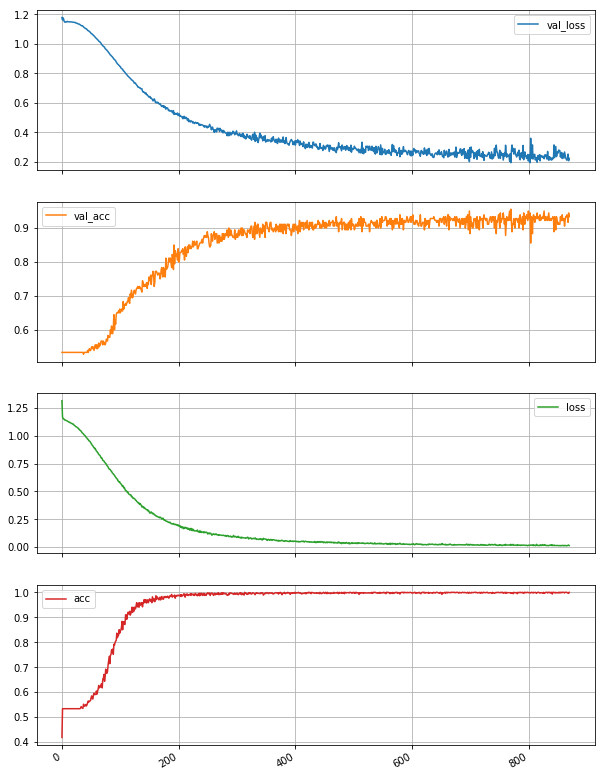

In [294]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [295]:
def decodeLabel(encodedLabel):
    
    # Converting the encoded target labels into their original string form
    # such as Fizz, Buzz, etc
    
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [296]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "vivekadi@buffalo.edu")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50290568")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 2  Correct :98
Testing Accuracy: 98.0
